## 1. Aesthetics

In the **Exploratory Data Visualization** last classes, we learned how to use visualizations to explore and understand data. Because we were focused on exploring trends and getting familiar with the data, we didn't focus much on tweaking the appearance of the plots to make them more presentable to others. We instead focused on the workflow of quickly creating, tweaking, displaying, and iterating on plots.

In the next mission, we'll focus on how to use data visualization to communicate insights and tell stories. We'll start with a standard matplotlib plot and improve its appearance to better communicate the patterns we want a viewer to understand. Along the way, we'll introduce the principles that informed those changes and provide a framework for you to apply them in the future. Here's a preview that demonstrates some of the improvements we make in this mission:


<img width="1000" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0Y3p4MkdLLXNuTDg">


## 2. Introduction to the data

The [Department of Education Statistics](http://nces.ed.gov/programs/digest/2013menu_tables.asp) releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. You can download the dataset Randal compiled [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv). Here's a preview of the first few rows:


| Year | Agriculture | Architecture | Art and Performance | Biology   | Business  | Communications and Journalism | Computer Science | Education | Engineering | English   | Foreign Languages | Health Professions | Math and Statistics | Physical Sciences | Psychology | Public Administration | Social Sciences and History |
|------|-------------|--------------|---------------------|-----------|-----------|-------------------------------|------------------|-----------|-------------|-----------|-------------------|--------------------|---------------------|-------------------|------------|-----------------------|-----------------------------|
| 1970 | 4.229798    | 11.921005    | 59.7                | 29.088363 | 9.064439  | 35.3                          | 13.6             | 74.535328 | 0.8         | 65.570923 | 73.8              | 77.1               | 38.0                | 13.8              | 44.4       | 68.4                  | 36.8                        |
| 1971 | 5.452797    | 12.003106    | 59.9                | 29.394403 | 9.503187  | 35.5                          | 13.6             | 74.149204 | 1.0         | 64.556485 | 73.9              | 75.5               | 39.0                | 14.9              | 46.2       | 65.5                  | 36.2                        |
| 1972 | 7.420710    | 13.214594    | 60.4                | 29.810221 | 10.558962 | 36.6                          | 14.9             | 73.554520 | 1.2         | 63.664263 | 74.6              | 76.9               | 40.2                | 14.8              | 47.6       | 62.6                  | 36.1                        |



Randal compiled this data set to explore the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics. This gap is reported on often [in the news](https://www.google.com/search?hl=en&gl=us&tbm=nws&authuser=0&q=gender+gap+stem&oq=gender+gap+stem&gs_l=news) and [not everyone agrees](http://www.pbs.org/newshour/making-sense/truth-women-stem-careers/) that there is a gap.

In this mission and the next few missions, we'll explore how we can communicate the nuanced narrative of gender gap using effective data visualization. Let's first generate a standard matplotlib plot.


<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Generate a line chart that visualizes the historical percentage of Biology degrees awarded to women:
    - Set the x-axis to the <span style="background-color: #F9EBEA; color:##C0392B">Year</span> column from <span style="background-color: #F9EBEA; color:##C0392B">women_degrees</span>.
    - Set the y-axis to the <span style="background-color: #F9EBEA; color:##C0392B">Biology</span> column from <span style="background-color: #F9EBEA; color:##C0392B">women_degrees</span>.
2. Display the plot.



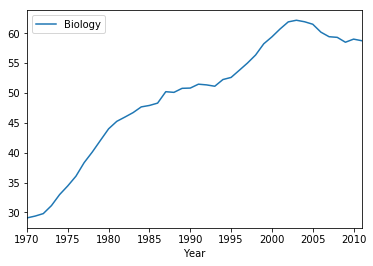

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
women_degrees = pd.read_csv("percent-bachelors-degrees-women-usa.csv")
%matplotlib inline
women_degrees.plot(kind='line',x='Year',y='Biology')

## 3. Visualizing the gender gap

From the plot, we can tell that Biology degrees increased steadily from 1970 and peaked in the early 2000's. We can also tell that the percentage has stayed above 50% since around 1987. While it's helpful to visualize the trend of Biology degrees awarded to women, it only tells half the story. If we want the gender gap to be apparent and emphasized in the plot, we need a visual analogy to the difference in the percentages between the genders.

If we visualize the trend of Biology degrees awarded to men on the same plot, a viewer can observe the space between the lines for each gender. We can calculate the percentages of Biology degrees awarded to men by subtracting each value in the <span style="background-color: #F9EBEA; color:##C0392B">Biology</span> column from <span style="background-color: #F9EBEA; color:##C0392B">100</span>. Once we have the male percentages, we can generate two line charts as part of the same diagram.

Let's now create a diagram containing both the line charts we just described.

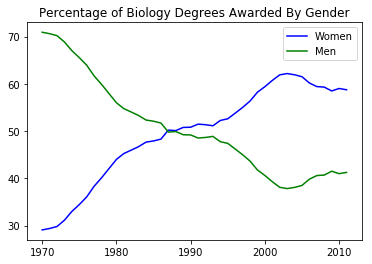

In [2]:
# Option 1

import matplotlib.pyplot as plt

plt.plot(women_degrees['Year'], 
         women_degrees['Biology'], c='blue', label='Women')
plt.plot(women_degrees['Year'], 
         100-women_degrees['Biology'], c='green', label='Men')
plt.legend(loc='upper right')
plt.title('Percentage of Biology Degrees Awarded By Gender')
plt.show()

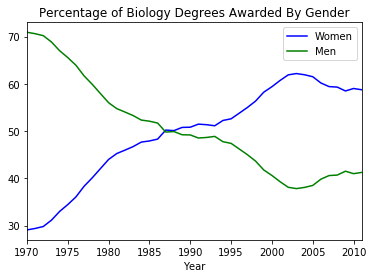

In [3]:
# Option 2

%matplotlib inline
women_degrees['men_bio'] = 100-women_degrees['Biology']
women_degrees.plot(kind='line',x='Year',y=['Biology','men_bio'],
                   title='Percentage of Biology Degrees Awarded By Gender',
                   color=['blue','green']).\
                        legend(loc='best',
                               labels=['Women','Men'])

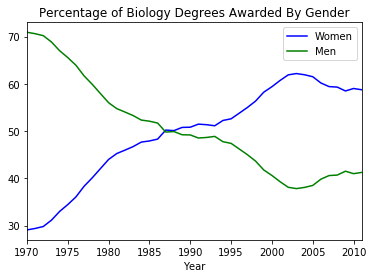

In [4]:
# option 3
# dataframe.plot return an axes object

ax = women_degrees.plot(kind='line',x='Year',y=['Biology','men_bio'],
                   title='Percentage of Biology Degrees Awarded By Gender',
                   color=['blue','green'])
ax.legend(loc='best',labels=['Women','Men'])

## 4. Data-Ink Ratio

The chart containing both line charts tells a more complete story than the one containing just the line chart that visualized just the women percentages. This plot instead tells the story of two distinct periods. In the first period, from 1970 to around 1987, women were a minority when it came to majoring in Biology while in the second period, from around 1987 to around 2012, women became a majority. You can see the point where women overtook men where the lines intersect. While a viewer could have reached the same conclusions using the individual line chart of just the women percentages, it would have required more effort and mental processing on their part.

Although our plot is better, it still contains some extra visual elements that aren't necessary to understand the data. We're interested in helping people understand the gender gap in different fields across time. These excess elements, sometimes known as [chartjunk](https://en.wikipedia.org/wiki/Chartjunk), increase as we add more plots for visualizing the other degrees, making it harder for anyone trying to interpret our charts. In general, we want to maximize the [data-ink ratio](http://www.infovis-wiki.net/index.php/Data-Ink_Ratio), which is the fractional amount of the plotting area dedicated to displaying the data.

The following is an animated GIF by [Darkhorse Analytics](http://blog.darkhorseanalytics.com/data-looks-better-naked) that shows a series of tweaks for boosting the data-ink ratio:


<img width="600" alt="creating a repo" src="http://cdn2.hubspot.net/hubfs/2020805/Imported_Blog_Media/data-ink.gif?t=1477583494534">


Non-data ink includes any elements in the chart that don't directly display data points. This includes tick markers, tick labels, and legends. Data ink includes any elements that display and depend on the data points underlying the chart. In a line chart, data ink would primarily be the lines and in a scatter plot, the data ink would primarily be in the markers. As we increase the data-ink ratio, we decrease non-data ink that can help a viewer understand certain aspects of the plots. We need to be mindful of this trade-off as we work on tweaking the appearance of plots to tell a story, because plots we create could end up telling the wrong story.

This principle was originally set forth by [Edward Tufte](https://en.wikipedia.org/wiki/Edward_Tufte), a pioneer of the field of data visualization. Tufte's first book, [The Visual Display of Quantitative Information](https://www.edwardtufte.com/tufte/books_vdqi), is considered a bible among information designers. We cover some of the ideas presented in the book in this course, but we recommend going through the entire book for more depth.

To improve the data-ink ratio, let's make the following changes to the plot we created in the last step:

- Remove all of the axis tick marks.
- Hide the spines, which are the lines that connects the tick marks, on each axis.


## 5. Hiding tick marks

To customize the appearance of the ticks, we use the [Axes.tick_params()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.tick_params) method. Using this method, we can modify which tick marks and tick labels are displayed. By default, matplotlib displays the tick marks on all four sides of the plot. Here are the four sides for a standard line chart:

- The left side is the y-axis.
- The bottom side is the x-axis.
- The top side is across from the x-axis.
- The right side is across from the y-axis.

The parameters for enabling or disabling tick marks are conveniently named after the sides. To hide all of them, we need to pass in the following values for each parameter when we call  <span style="background-color: #F9EBEA; color:##C0392B">Axes.tick_params()</span>:

- **bottom: "off"**
- **top: "off"**
- **left: "off"**
- **right: "off"**



<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Generate 2 line chart in the same plotting area:
    - One that visualizes the percentages of Biology degrees awarded to women over time. Set the line color to **"blue"** and the label to **"Women"**.
    - One that visualizes the percentages of Biology degrees awarded to men over time. Set the line color to **"green"** and the label to **"Men"**.
2. Remove all of the tick marks.
3. Set the title of the plot to **"Percentage of Biology Degrees Awarded By Gender"**.
4. Generate a legend and place it in the **"upper right"** location.
5. Display the chart.

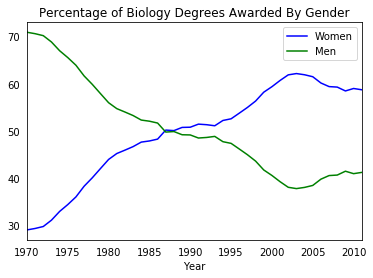

In [5]:
ax = women_degrees.plot(kind='line',x='Year',y=['Biology','men_bio'],
                   title='Percentage of Biology Degrees Awarded By Gender',
                   color=['blue','green'])
ax.legend(loc='best',labels=['Women','Men'])
ax.tick_params(bottom='off',top='off',left='off',right='off')

## 6. Hiding spines


With the axis tick marks gone, the data-ink ratio is improved and the chart looks much cleaner. In addition, the spines in the chart now are no longer necessary. When we're exploring data, the spines and the ticks complement each other to help us refer back to specific data points or ranges. When a viewer is viewing our chart and trying to understand the insight we're presenting, the ticks and spines can get in the way. As we mentioned earlier, chartjunk becomes much more noticeable when you have multiple plots in the same chart. By keeping the axis tick labels but not the spines or tick marks, we strike an appropriate balance between hiding chartjunk and making the data visible.

In matplotlib, the spines are represented using the [matplotlib.spines.Spine](http://matplotlib.org/api/spines_api.html) class. When we create an Axes instance, four Spine objects are created for us. If you run <span style="background-color: #F9EBEA; color:##C0392B">print(ax.spines)</span>, you'll get back a dictionary of the Spine objects:

>```python
{'right': <matplotlib.spines.spine object="" at="" 0x111089c18="">, 'bottom': <matplotlib.spines.spine object="" at="" 0x111060898="">, 'top': <matplotlib.spines.spine object="" at="" 0x1110606a0="">, 'left': <matplotlib.spines.spine object="" at="" 0x11107cd30="">}
</matplotlib.spines.spine></matplotlib.spines.spine></matplotlib.spines.spine></matplotlib.spines.spine>
```


To hide all of the spines, we need to:

- access each Spine object in the dictionary
- call the <span style="background-color: #F9EBEA; color:##C0392B">Spine.set_visible()</span> method
- pass in the Boolean value <span style="background-color: #F9EBEA; color:##C0392B">False</span>

The following line of code removes the spines for the right axis:

>```python
ax.spines["right"].set_visible(False)
```

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. In the previous exercise hide all of the spines.
2. Display the chart.

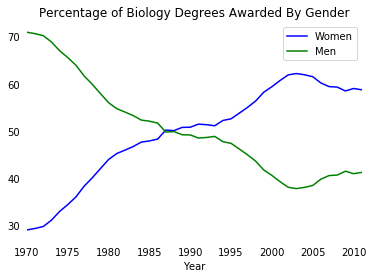

In [6]:
ax = women_degrees.plot(kind='line',x='Year',y=['Biology','men_bio'],
                   title='Percentage of Biology Degrees Awarded By Gender',
                   color=['blue','green'])
ax.legend(loc='best',labels=['Women','Men'])
ax.tick_params(bottom='off',top='off',left='off',right='off')
directions = ['bottom','top','left','right']
for i in directions:
    ax.spines[i].set_visible(False)
ax

## 7. Comparing Gender Gap Across Degree Categories

So far, matplotlib has set the limits automatically for each axis and this hasn't had any negative effect on communicating our story with data. If we want to generate charts to compare multiple degree categories, the axis ranges need to be consistent. Inconsistent data ranges can distort the story our charts are telling and fool the viewer.

Edward Tufte often preaches that a good chart encourages comparison over just description. A good chart uses a consistent style for the elements that aren't directly conveying the data points. These elements are part of the non-data ink in the chart. By keeping the non-data ink as consistent as possible across multiple plots, differences in those elements stick out easily to the viewer. This is because our visual processing systems are excellent at discerning differences quickly and brings them to the front of our thought process. The similarities naturally fade to the back of our thought process.

Let's generate line charts for four STEM degree categories on a grid to encourage comparison. Our instructions for generating the chart are cumbersome. Here's what the final chart looks like, so you can refer to it as you write your code:


<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0M2NjazV1ZzZ6ZmM">


<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Generate a line chart using the women and men percentages for **Biology** in the top left subplot.
2. Generate a line chart using the women and men percentages for **Computer Science** in the top right subplot.
3. Generate a line chart using the women and men percentages for **Engineering** in the bottom left subplot.
4. Generate a line chart using the women and men percentages for **Math and Statistics** in the bottom right subplot.
5. For all subplots:
    - For the line chart visualizing female percentages, set the line color to **"blue"** and the label to **"Women"**.
    - For the line chart visualizing male percentages, set the line color to **"green"** and the label to **"Men"**.
    - Set the **x-axis limit** to range from **1968 to 2011**.
    - Set the **y-axis limit** to range from **0 to 100**.
    - Hide all of the spines and tick marks.
    - Set the title of each subplot to the name of the major category (e.g. "Biology", "Computer Science").
5. Place a legend in the upper right corner of the bottom right subplot.
6. Display the plot.

Note: https://stackoverflow.com/questions/22483588/how-can-i-plot-separate-pandas-dataframes-as-subplots

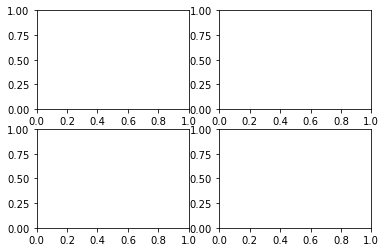

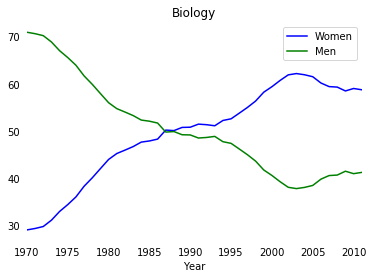

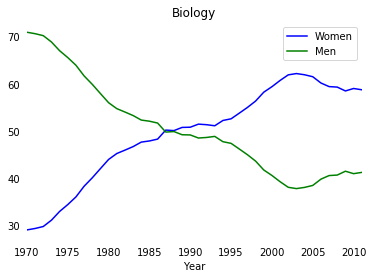

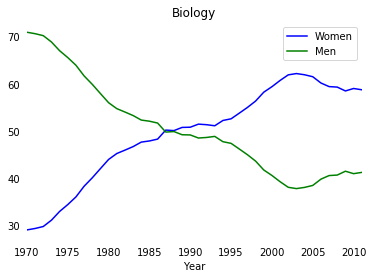

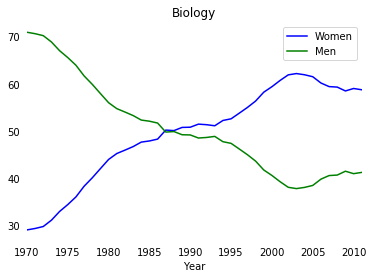

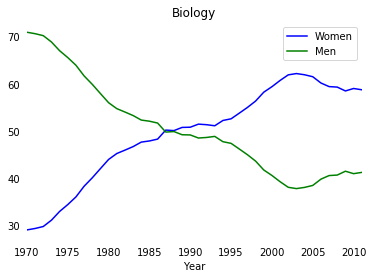

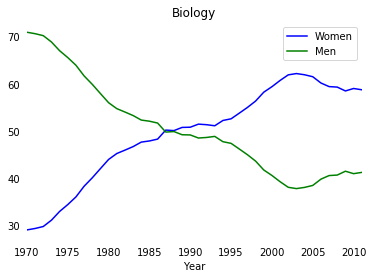

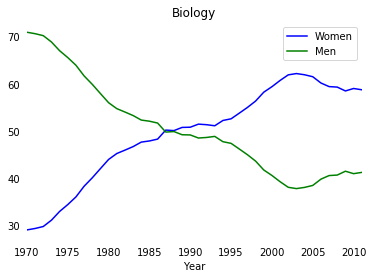

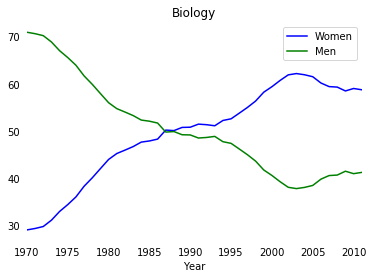

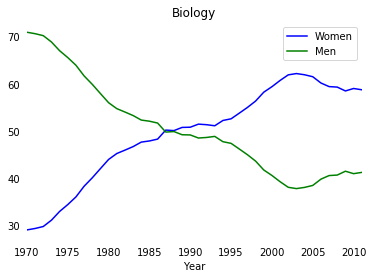

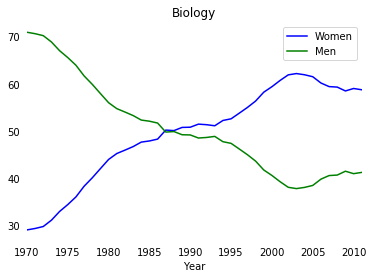

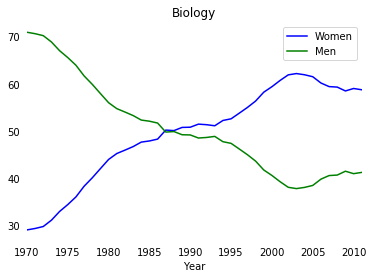

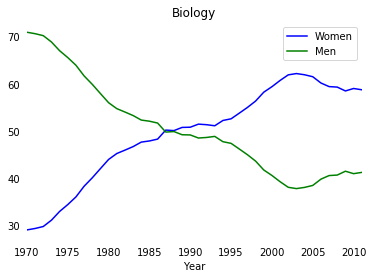

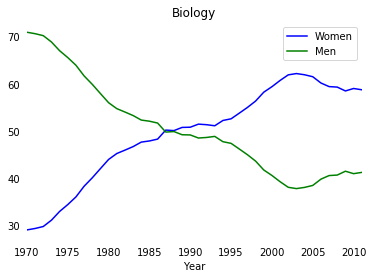

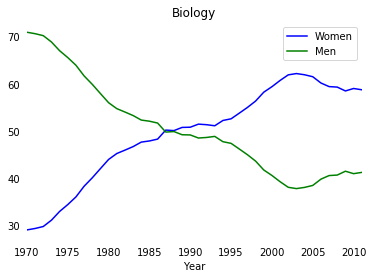

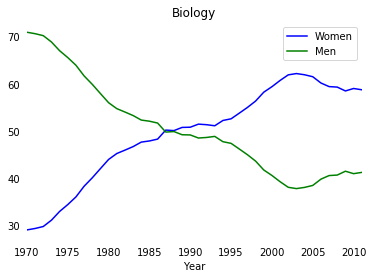

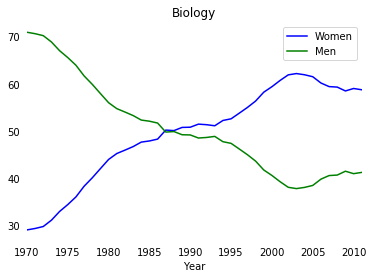

In [10]:
charts = ['Biology','Computer Science','Engineering','Math and Statistics']
fig, axes = plt.subplots(nrows=2,ncols=2)
for i in range(0,4):
    for char in charts:
        axes[i//2,i%2] = women_degrees.plot(kind='line',x='Year',y=[chart,'men_bio'],
                           title=chart,
                           color=['blue','green'])
        axes[i//2,i%2].legend(loc='best',labels=['Women','Men'])
        axes[i//2,i%2].tick_params(bottom='off',top='off',left='off',right='off')
        directions = ['bottom','top','left','right']
        for j in directions:
            axes[i//2,i%2].spines[j].set_visible(False)

## Conclusions

By spending just a few seconds reading the chart, we can conclude that the gender gap in Computer Science and Engineering have big gender gaps while the gap in Biology and Math and Statistics is quite small. In addition, the first two degree categories are dominated by men while the latter degree categories are much more balanced. This chart can still be improved, however, and we'll explore more techniques in the next mission.

In this mission, we explored how to enhance a chart's storytelling capabilities by minimizing chartjunk and encouraging comparison. In the next mission, we'll explore how to use color, spacing, and weights to further enhance the storytelling capability of the plots.